### Preparing Chicago crime dataset for machine learning work flow.
## Divya TV
### Our solution statement:
#### Use the machine learning workflow to process and transform Chicago crime dataset to create a prediction model. This model must predict if a crime will result in an arrest with 70% or greater accuracy.

ID - Unique identifier for the record.

Date - Date when the incident occurred. this is sometimes a best estimate.

IUCR - The Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description. See the list of IUCR codes at https://data.cityofchicago.org/d/c7ck-438e.

Primary Type - The primary description of the IUCR code.

Description - The secondary description of the IUCR code, a subcategory of the primary description.
Arrest - Indicates whether an arrest was made.

Beat - Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts. See the beats at https://data.cityofchicago.org/d/aerh-rz74.

District - Indicates the police district where the incident occurred. See the districts at https://data.cityofchicago.org/d/fthy-xz3r.

Ward - The ward (City Council district) where the incident occurred. See the wards at https://data.cityofchicago.org/d/sp34-6z76.

Community Area - Indicates the community area where the incident occurred. Chicago has 77 community areas. See the community areas at https://data.cityofchicago.org/d/cauq-8yn6.

FBI Code - Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). See the Chicago Police Department listing of these classifications at http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html.

X Coordinate - The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

Y Coordinate - The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

Year - Year the incident occurred.

Latitude - The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

Longitude - The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

Location - The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.




In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from IPython.display import IFrame
from IPython.core.display import display
import os
import time
import seaborn as sns

In [14]:
#### Function definition to read the dataset

def read_crime_data():
    
    file = os.path.join('Resources','Crimes_2001_to_present.csv')
    crime_df = pd.read_csv(file)
    return crime_df

In [15]:
df=read_crime_data()

In [16]:
df = df.dropna()
df.drop(['X Coordinate', 'Y Coordinate'], axis=1, inplace=True)

In [5]:
### Drawing a correlation matrix to see if some features are the same
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

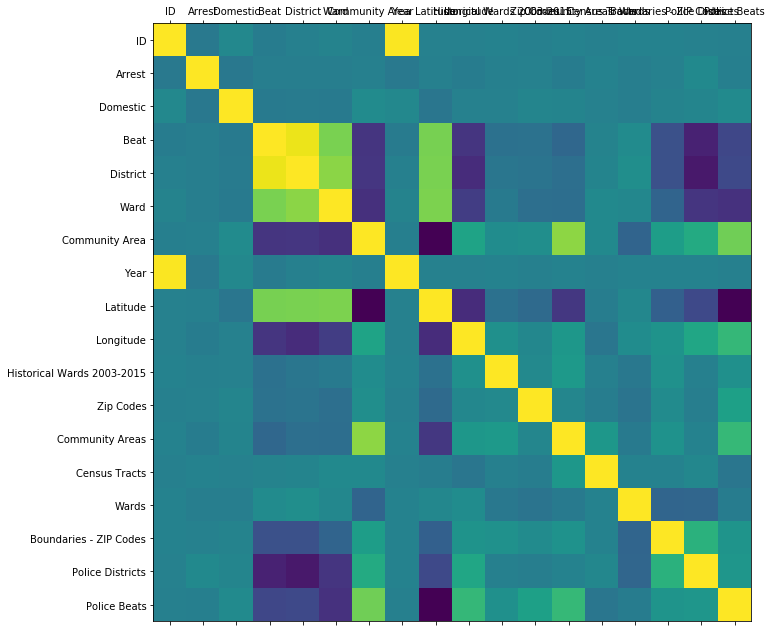

In [17]:
plot_corr(df)

## The Beat and District show high correlation, hence dropping them.

In [18]:
df.drop(['Beat', 'District'], axis=1, inplace=True)

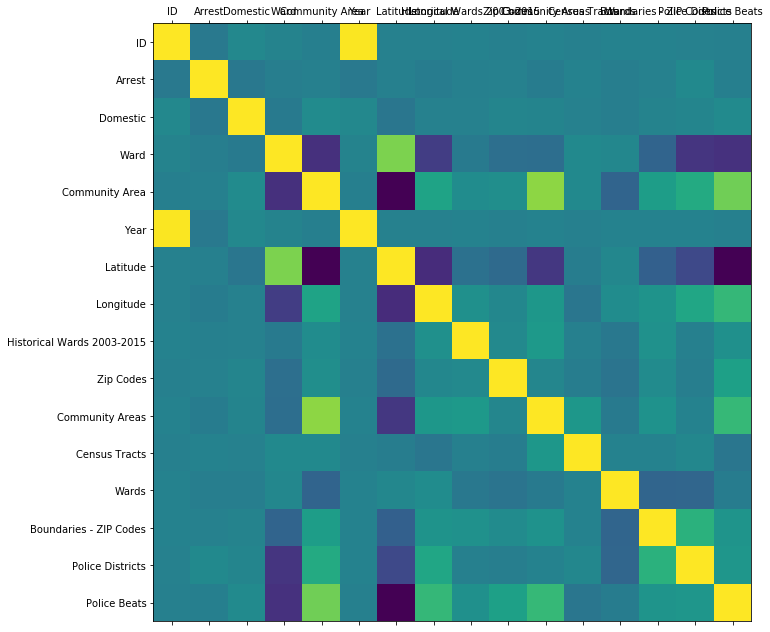

In [19]:
plot_corr(df)

### Changing the categorical values into numerical values.

In [20]:
### make arrests binary using map function
arrests_map={True:1, False:0}
df['Arrest']=df['Arrest'].map(arrests_map)

In [21]:

### remove some of the columns
## Description - detailed description not needed covered in crime type
## Case number - ID will be enough
## Block - address which is hashed
## HIstorical wards - not needed
## Location has both Lat and lon in a tuple
## Zip codes not needed as we have the lat and long- KEEPING ZIPCODES

df.drop(['Description','Case Number','Block','Historical Wards 2003-2015','Location'], axis=1, inplace=True)



In [22]:
#df[['Daten','Time']] = df['Date'].str.split(' ', expand=True)
df['OnlyDate'], df['Time'] = df['Date'].str.split(' ', 1).str


df['OnlyDate'] = pd.to_datetime(df['OnlyDate']).dt.date
df['OnlyDate'] = pd.to_datetime(df.OnlyDate,format='%Y-%m-%d')

In [23]:
for col in df.columns: 
    print(col) 

ID
Date
IUCR
Primary Type
Location Description
Arrest
Domestic
Ward
Community Area
FBI Code
Year
Updated On
Latitude
Longitude
Zip Codes
Community Areas
Census Tracts
Wards
Boundaries - ZIP Codes
Police Districts
Police Beats
OnlyDate
Time


In [24]:
df.head(2)

,ID,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Ward,Community Area,FBI Code,...,Longitude,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,OnlyDate,Time
0,11859143,10/12/2019 11:58:00 PM,1310,CRIMINAL DAMAGE,APARTMENT,0,False,6.0,67.0,14,...,-87.657826,22257.0,65.0,21.0,32.0,23.0,17.0,216.0,2019-10-12,11:58:00 PM
1,11859039,10/12/2019 11:57:00 PM,2092,NARCOTICS,PARKING LOT/GARAGE(NON.RESID.),1,False,28.0,26.0,18,...,-87.723882,21572.0,27.0,736.0,23.0,30.0,16.0,82.0,2019-10-12,11:57:00 PM


In [25]:
crime_df=df.rename(columns={"Primary Type": "CrimeType"})
crime_df.CrimeType.unique()

array(['CRIMINAL DAMAGE', 'NARCOTICS', 'BATTERY', 'THEFT',
       'CRIMINAL TRESPASS', 'OTHER OFFENSE', 'ASSAULT',
       'MOTOR VEHICLE THEFT', 'CONCEALED CARRY LICENSE VIOLATION',
       'BURGLARY', 'ROBBERY', 'INTERFERENCE WITH PUBLIC OFFICER',
       'WEAPONS VIOLATION', 'OFFENSE INVOLVING CHILDREN',
       'DECEPTIVE PRACTICE', 'HOMICIDE', 'PUBLIC PEACE VIOLATION',
       'SEX OFFENSE', 'CRIM SEXUAL ASSAULT', 'LIQUOR LAW VIOLATION',
       'INTIMIDATION', 'PROSTITUTION', 'ARSON', 'OBSCENITY', 'GAMBLING',
       'STALKING', 'KIDNAPPING', 'PUBLIC INDECENCY', 'NON-CRIMINAL',
       'HUMAN TRAFFICKING', 'OTHER NARCOTIC VIOLATION',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL', 'RITUALISM'],
      dtype=object)

In [26]:
crime_df.shape

(6286967, 23)

In [27]:
##### Dont have to do this - USE IUCR code instead ########################
#### Keeping this piece of code for furure reference. ####################

crimetypes=['CRIMINAL DAMAGE', 'NARCOTICS', 'BATTERY', 'THEFT',
       'CRIMINAL TRESPASS', 'OTHER OFFENSE', 'ASSAULT',
       'MOTOR VEHICLE THEFT', 'CONCEALED CARRY LICENSE VIOLATION',
       'BURGLARY', 'ROBBERY', 'INTERFERENCE WITH PUBLIC OFFICER',
       'WEAPONS VIOLATION', 'OFFENSE INVOLVING CHILDREN',
       'DECEPTIVE PRACTICE', 'HOMICIDE', 'PUBLIC PEACE VIOLATION',
       'SEX OFFENSE', 'CRIM SEXUAL ASSAULT', 'LIQUOR LAW VIOLATION',
       'INTIMIDATION', 'PROSTITUTION', 'ARSON', 'OBSCENITY', 'GAMBLING',
       'STALKING', 'KIDNAPPING', 'PUBLIC INDECENCY', 'NON-CRIMINAL',
       'HUMAN TRAFFICKING', 'OTHER NARCOTIC VIOLATION',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL', 'RITUALISM']


crime_df['crimetype_cat']=crime_df.CrimeType.astype("category", categories=crimetypes).cat.codes

C:\Users\divya\Anaconda3\envs\pythonData\lib\site-packages\IPython\core\interactiveshell.py:3296: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


In [28]:
export_csv = crime_df.to_csv (r'nonull_date_binary_corr.csv', index = None, header=True)

In [29]:
crime_df.Description.unique()

array(['TO PROPERTY', 'SOLICIT NARCOTICS ON PUBLICWAY',
       'AGG PO HANDS NO/MIN INJURY', '$500 AND UNDER', 'TO VEHICLE',
       'RETAIL THEFT', 'MANU/DEL:CANNABIS OVER 10 GMS',
       'FALSE/STOLEN/ALTERED TRP', 'SIMPLE', 'AUTOMOBILE', 'TO RESIDENCE',
       'OTHER', 'DOMESTIC BATTERY SIMPLE', 'AGGRAVATED: HANDGUN',
       'UNLAWFUL ENTRY', 'ARMED: HANDGUN', 'OVER $500',
       'RESIST/OBSTRUCT/DISARM OFFICER', 'FORCIBLE ENTRY',
       'POSS: HEROIN(WHITE)',
       'AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST',
       'UNLAWFUL POSS OF HANDGUN', 'CRIMINAL DEFACEMENT',
       'RECKLESS FIREARM DISCHARGE', 'HARASSMENT BY TELEPHONE',
       'UNLAWFUL USE HANDGUN', 'SEX ASSLT OF CHILD BY FAM MBR',
       'TELEPHONE THREAT', 'VEHICULAR HIJACKING',
       'AGGRAVATED: OTHER DANG WEAPON', 'AGGRAVATED OF A SENIOR CITIZEN',
       'AGGRAVATED:KNIFE/CUTTING INSTR', 'STRONGARM - NO WEAPON',
       'FROM BUILDING', 'VEHICLE TITLE/REG OFFENSE',
       'AGG PRO.EMP: OTHER DANG WEAPON', 'POSS

In [28]:
domestic_map={True:1, False:0}
crime_df['Domestic']=crime_df['Domestic'].map(domestic_map)

In [29]:
crime_df.head(2)

,ID,Date,IUCR,CrimeType,Location Description,Arrest,Domestic,Ward,Community Area,FBI Code,...,Longitude,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,OnlyDate,Time
0,11859143,10/12/2019 11:58:00 PM,1310,CRIMINAL DAMAGE,APARTMENT,0,0,6.0,67.0,14,...,-87.657826,22257.0,65.0,21.0,32.0,23.0,17.0,216.0,2019-10-12,11:58:00 PM
1,11859039,10/12/2019 11:57:00 PM,2092,NARCOTICS,PARKING LOT/GARAGE(NON.RESID.),1,0,28.0,26.0,18,...,-87.723882,21572.0,27.0,736.0,23.0,30.0,16.0,82.0,2019-10-12,11:57:00 PM


### Saved the prepared data to be used by machine learning workflow.

In [ ]:
export_csv = crime_df.to_csv (r'nonull_date_binary_arr_domestic_corr_removecol.csv', index = None, header=True)